### Область работы 1 (библиотеки)

## Подготовка данных

In [ ]:
#pip install category-encoders

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler,Normalizer
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
#import category_encoders as ce
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss, zero_one_loss
from sklearn.metrics import precision_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.feature_selection import VarianceThreshold


In [2]:
path_train = 'train_house_A.csv' # содержит только имя файла, без имен папок !!!
df_train=pd.read_csv(path_train)

In [3]:
df_train

,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,5320000,0.405623,0.0,-0.061169,-0.741051,-0.223185,1.361397,1.221991,-0.570187,-0.478408,-0.465315,-1.592404,-1.668320,-0.929397,1.517692,-0.142607,0.994994,1.472618,-0.280781,1.860696,0.245475,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,0.271470,1.391006,-0.141322
1,3465000,0.405623,0.0,-0.826890,-0.867066,-0.223185,-0.734539,-0.964205,-0.570187,-0.478408,-0.465315,0.729512,0.913740,-0.929397,-0.805741,0.307755,1.615664,-0.679063,1.311928,-1.087695,-1.444928,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.010746,0.617421,-0.141322
2,3500000,0.405623,0.0,-0.963310,-1.676106,-0.223185,-0.734539,-0.692084,-0.570187,-0.478408,-0.465315,-0.024866,0.427448,0.224410,-0.805741,-1.033235,1.648072,-0.679063,0.470806,0.217582,1.578828,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.126718,-1.237596,1.483005,-0.141322
3,3570000,0.405623,0.0,0.242611,0.193424,-0.223185,-0.734539,-0.696696,-0.570187,1.307431,-0.465315,0.445396,1.056981,-0.929397,-0.805741,-1.119627,1.488127,-0.679063,-1.039726,0.442600,-1.675466,-0.263991,-1.308863,1.222962,-0.219265,-0.554035,0.417348,-0.987324,1.134657,-0.141322
4,4130000,0.405623,0.0,-0.740827,-0.684767,-0.223185,-0.734539,-0.239163,-0.570187,-0.478408,-0.465315,-0.024866,-0.825728,0.224410,-0.805741,0.232269,-1.316654,1.472618,1.747297,-1.109080,-1.347578,-0.263991,1.403419,-0.091662,-0.219265,-0.554035,-0.108582,0.838006,0.360062,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,0.405623,0.0,1.008081,1.658059,-0.223185,-0.734539,-0.696696,-0.570187,-0.478408,-0.465315,-0.024866,0.343618,0.224410,-0.805741,2.948326,1.045927,1.472618,1.491291,-1.123612,-1.341446,-0.263991,0.047278,-1.406286,-0.219265,-0.554035,-0.126718,-1.532214,1.329553,-0.141322
404,5250000,0.405623,0.0,1.592671,-0.816078,-0.223185,1.361397,-0.622901,-0.570187,-0.478408,2.149083,-0.024866,-1.312213,0.224410,0.355976,1.138751,-1.352775,-0.679063,-0.269301,1.375053,-0.144745,-0.263991,0.047278,1.222962,-0.219265,1.804941,-0.126718,-1.320247,0.041976,-0.141322
405,5950000,0.405623,0.0,0.582200,0.458904,-0.223185,1.361397,0.640850,-0.570187,-0.478408,2.149083,-0.975186,0.524128,-0.929397,1.517692,-0.653206,1.140005,-0.679063,-1.273605,-1.181372,-0.734544,-0.263991,0.047278,-1.406286,-0.219265,1.804941,-0.126718,-0.017405,-1.353372,-0.141322
406,4319000,0.405623,0.0,-0.973555,0.522287,-0.223185,1.361397,-0.515897,-0.570187,1.307431,-0.465315,0.253372,-0.994006,-0.929397,-0.805741,0.330239,1.305237,-0.679063,1.109630,-0.349190,-0.282323,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,0.195188,-0.131175,1.363075,-0.141322


In [4]:
df_train.describe()

,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.643597e+06,-0.030652,0.0,-0.021898,-0.004470,-0.044734,-0.015345,-0.037179,0.005930,-0.005686,-0.016766,-0.049938,0.050711,-0.049902,-0.036958,-0.033847,-0.018777,-0.035668,-0.008261,-0.061349,-0.046552,-0.022184,-0.042466,0.017890,-0.043530,-0.039454,-0.038181,-0.048110,-0.025252,-0.044926
std,1.711368e+06,1.031893,0.0,1.019428,0.974612,0.969756,0.996282,1.001595,0.976837,1.007006,0.986851,1.013027,0.991348,0.980538,0.989583,0.980263,0.987751,0.986310,0.988047,0.898859,0.991383,1.020601,0.995270,1.016147,0.900616,0.975409,1.031259,1.008422,1.001805,0.913917
min,1.750000e+06,-2.465344,0.0,-1.224688,-1.780233,-2.633407,-0.734539,-1.614530,-0.570187,-4.050087,-0.465315,-5.413279,-1.691355,-0.929397,-0.805741,-1.589857,-1.705826,-0.679063,-1.669422,-1.508830,-1.705711,-2.319351,-2.665004,-1.406286,-0.219265,-0.554035,-5.000645,-1.789595,-1.705457,-3.418780
25%,3.430000e+06,0.405623,0.0,-0.673496,-0.837351,-0.223185,-0.734539,-0.745125,-0.570187,-0.478408,-0.465315,-0.037112,-0.826372,-0.929397,-0.805741,-0.742003,-0.853757,-0.679063,-0.853475,-0.739260,-0.881357,-0.263991,-1.308863,-1.406286,-0.219265,-0.554035,-0.126718,-0.896013,-0.887341,-0.141322
50%,4.270000e+06,0.405623,0.0,-0.252391,0.032263,-0.223185,-0.734539,-0.300045,-0.570187,-0.478408,-0.465315,-0.024866,0.077075,0.224410,-0.805741,-0.284471,-0.016293,-0.679063,-0.108781,-0.231619,-0.072463,-0.263991,0.047278,-0.091662,-0.219265,-0.554035,-0.126718,-0.047954,-0.050893,-0.141322
75%,5.600000e+06,0.405623,0.0,0.312075,0.775898,-0.223185,1.361397,0.454055,1.421812,1.307431,-0.465315,0.284968,0.912021,0.224410,0.355976,0.507376,0.772849,1.472618,0.785738,0.349557,0.755884,-0.263991,0.047278,1.222962,-0.219265,-0.554035,-0.006287,0.787204,0.798591,-0.141322
max,1.141000e+07,0.405623,0.0,8.604753,1.732550,13.826353,1.361397,5.096263,3.413810,3.093270,2.149083,4.285865,1.747152,2.532024,2.679409,3.233920,1.795972,1.472618,1.815382,3.360617,1.745647,7.957450,4.115701,1.222962,4.560702,1.804941,13.021551,1.732996,1.771548,3.136137


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [6]:
df_train.isna().any()

price    False
0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
dtype: bool

In [ ]:
# df_train = df_train.dropna(subset=['cat_bin'])
# imputer = SimpleImputer(strategy='median',missing_values=np.nan)
# column_to_impute = ['cat_bin']
# df_test[column_to_impute] = imputer.fit_transform(df_test[column_to_impute])

In [9]:
df_train[df_train.duplicated()==True]

,price,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28


In [8]:
df_train.duplicated().any()

False

In [10]:
df_train.drop('1', axis=1, inplace=True)


In [ ]:
#df_train=df_train.drop_duplicates() 

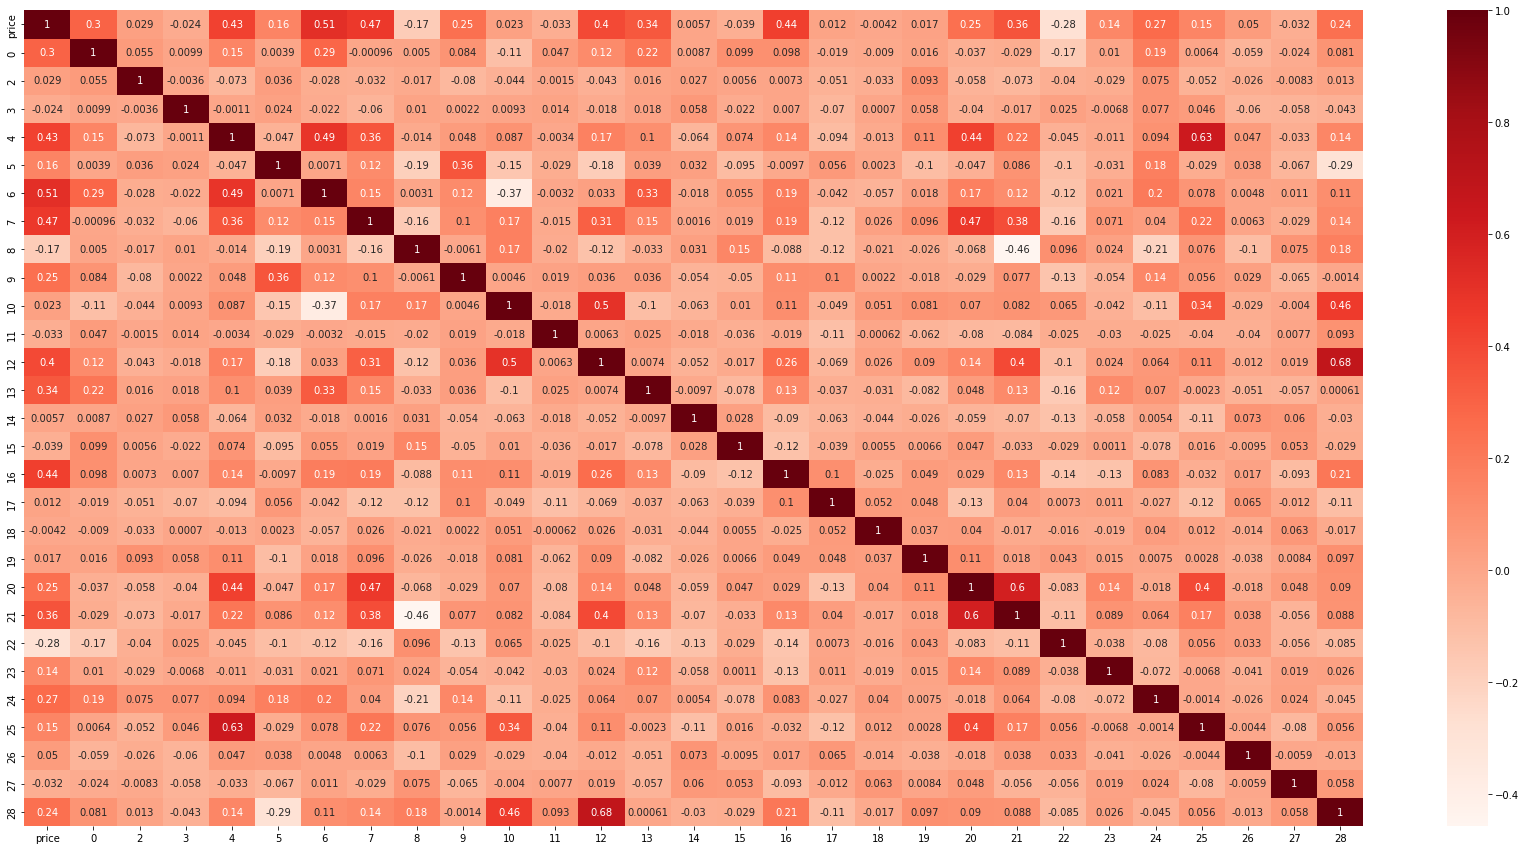

In [12]:
plt.figure(figsize=(30,15))
sns.heatmap(df_train.corr(),annot=True,cmap='Reds')
plt.show()
#0,4,6,7,9,12,13,16,20,21

In [105]:
df_target=df_train['price']
df_data=df_train.drop('price', axis=1)


In [106]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, random_state=53)

In [107]:
print("X_train",X_train.shape )
print("y_train",y_train.shape )
print("X_test",X_test.shape )
print("y_test",y_test.shape )

X_train (306, 13)
y_train (306,)
X_test (102, 13)
y_test (102,)


## Поиск фич

In [16]:
# th = 0.8
# transform_threshold = VarianceThreshold(threshold=(th * (1 - th)))
# df_data_transformed = pd.DataFrame(transform_threshold.fit_transform(df_data), 
#                                    columns=df_data.columns[transform_threshold.get_support()])

In [108]:
th = 0.8
transform_threshold = VarianceThreshold(threshold=(th * (1 - th)))
transform_threshold.fit(df_data)

low_variance_features = df_data.columns[~transform_threshold.get_support()]

print("Features with low variance:")
print(low_variance_features)

Features with low variance:
Index([], dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

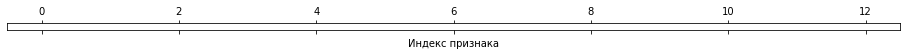

In [109]:
mask = transform_threshold.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.1);
plt.yticks([])
plt.xlabel("Индекс признака")
transform_threshold.get_support()

In [110]:
# correlation_matrix = df_train.corrwith(df_train['target'])
# threshold = 0.01
# selected_features = correlation_matrix[abs(correlation_matrix) >= threshold].index
# df_train_selected = df_train[selected_features]

In [43]:
df_train.drop(['14', '17', '18', '19'],axis=1,inplace=True)

In [111]:
df_train

,price,4,5,6,7,9,10,12,16,20,24,25,26,28
0,5320000,-0.223185,1.361397,1.221991,-0.570187,-0.465315,-1.592404,-0.929397,1.472618,-0.263991,1.804941,-0.126718,0.271470,-0.141322
1,3465000,-0.223185,-0.734539,-0.964205,-0.570187,-0.465315,0.729512,-0.929397,-0.679063,-0.263991,-0.554035,-0.126718,-1.010746,-0.141322
2,3500000,-0.223185,-0.734539,-0.692084,-0.570187,-0.465315,-0.024866,0.224410,-0.679063,-0.263991,-0.554035,-0.126718,-1.237596,-0.141322
3,3570000,-0.223185,-0.734539,-0.696696,-0.570187,-0.465315,0.445396,-0.929397,-0.679063,-0.263991,-0.554035,0.417348,-0.987324,-0.141322
4,4130000,-0.223185,-0.734539,-0.239163,-0.570187,-0.465315,-0.024866,0.224410,1.472618,-0.263991,-0.554035,-0.108582,0.838006,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,-0.223185,-0.734539,-0.696696,-0.570187,-0.465315,-0.024866,0.224410,1.472618,-0.263991,-0.554035,-0.126718,-1.532214,-0.141322
404,5250000,-0.223185,1.361397,-0.622901,-0.570187,2.149083,-0.024866,0.224410,-0.679063,-0.263991,1.804941,-0.126718,-1.320247,-0.141322
405,5950000,-0.223185,1.361397,0.640850,-0.570187,2.149083,-0.975186,-0.929397,-0.679063,-0.263991,1.804941,-0.126718,-0.017405,-0.141322
406,4319000,-0.223185,1.361397,-0.515897,-0.570187,-0.465315,0.253372,-0.929397,-0.679063,-0.263991,-0.554035,0.195188,-0.131175,-0.141322


In [112]:
correlation_matrix = df_train.corrwith(df_train['price'])
threshold = 0.02

low_corr_features = correlation_matrix[abs(correlation_matrix) < threshold].index

print("Features with low correlation:")
print(low_corr_features)

Features with low correlation:
Index([], dtype='object')


In [149]:
mo = Ridge(alpha = 0.25)

mo_ridge = mo.fit(X_train, y_train)
ridge_predictions = mo_ridge.predict(X_test)

In [150]:
mo_ridge.score(X_test, y_test)

0.5273151658476865

In [151]:
mo_ridge.coef_

array([112241.46073666, 190042.46569523, 662871.80323645, 419112.43260676,
       162436.1555671 ,   3841.90535498, 434856.7845312 , 466783.67233972,
        25243.34802781, 171003.61931601,  16766.31703976,  66448.29652562,
       -47256.26415259])

In [152]:
model_2 = Lasso()
model_lasso = model_2.fit(X_train, y_train)
lasso_predictions = model_lasso.predict(X_test)

In [153]:
model_lasso.score(X_test, y_test)

0.5271887361075648

In [154]:
mean_absolute_percentage_error(y_test,ridge_predictions)

0.21812450477292764

In [155]:
mean_absolute_percentage_error(y_test,lasso_predictions)


0.2181381760582787

In [120]:
model_lasso.coef_

array([111728.07488318, 190160.396373  , 663762.20190383, 419389.96809805,
       162317.09679507,   4137.00371682, 435458.95769985, 466991.48199099,
        25105.7640198 , 170933.27308589,  16933.75088547,  66538.89321155,
       -47943.59347844])

In [58]:
from sklearn.feature_selection import SelectPercentile


In [121]:
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))

форма массива X_train: (306, 13)
форма массива X_train_selected: (306, 6)


In [122]:
X_train_selected

array([[-0.22318476, -0.36922796, -0.57018671, -0.26399122, -0.12671795,
        -0.14132159],
       [-0.22318476,  0.92311856, -0.57018671, -0.26399122, -0.12671795,
        -0.14132159],
       [-0.22318476, -0.47530922, -0.57018671, -0.26399122,  0.1453152 ,
        -0.14132159],
       ...,
       [-0.22318476, -0.57677825, -0.57018671, -0.26399122, -0.12671795,
        -0.14132159],
       [-0.22318476,  0.25342293, -0.57018671, -0.26399122, -0.12671795,
        -0.14132159],
       [-0.22318476, -0.06482086, -0.57018671, -0.26399122, -0.12671795,
        -0.14132159]])

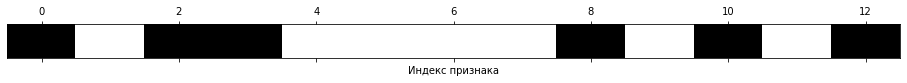

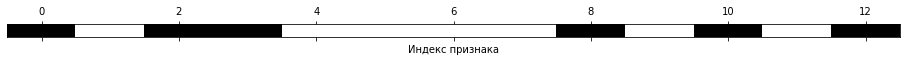

In [123]:
mask = select_pct.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");

mask = select_pct.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");


In [124]:
selected_features = X_train.columns[select_pct.get_support()]

print("Выбранные признаки:")
print(selected_features)


Выбранные признаки:
Index(['4', '6', '7', '20', '25', '28'], dtype='object')


In [125]:
selected_features_indices = select_pct.get_support()
print("Индексы выбранных признаков:")
print(selected_features_indices)


Индексы выбранных признаков:
[ True False  True  True False False False False  True False  True False
  True]


In [126]:
select_pct

SelectPercentile(percentile=50)

In [128]:
bad_features = X_train.columns[bad_features_indices]

print("Неотобр признаки:")
print(bad_features)



IndexError: boolean index did not match indexed array along dimension 0; dimension is 13 but corresponding boolean dimension is 24

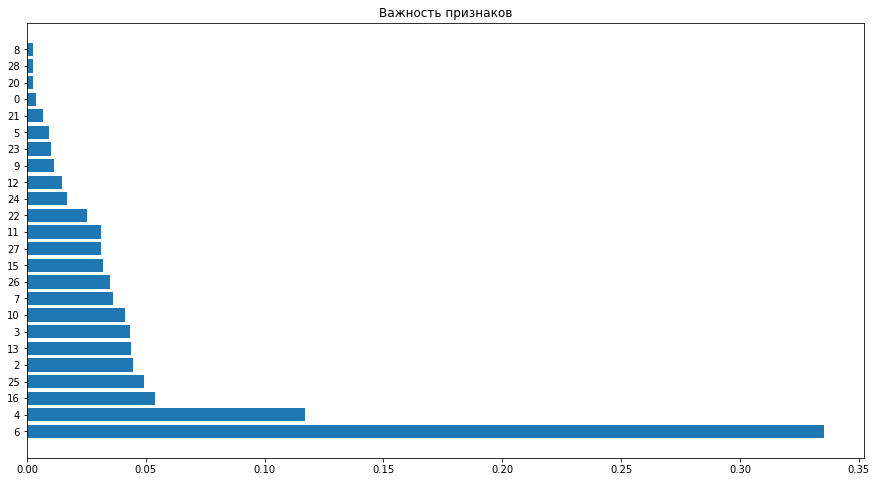

In [75]:
rfc = RandomForestRegressor(n_estimators=300, random_state=50)
rfc.fit(X_train, y_train)

plt.figure(figsize=(15, 8))

feature_names = df_train.columns

importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

plt.barh(width=importance, y=feature_names[importance_name])
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()


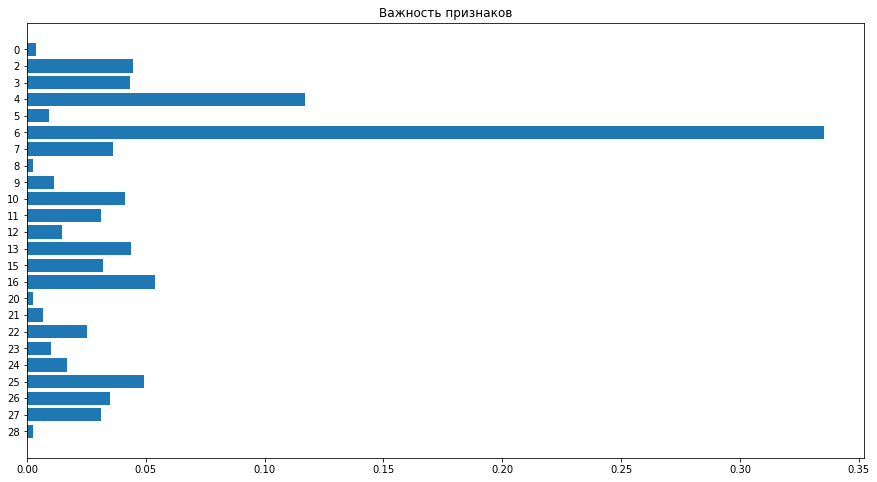

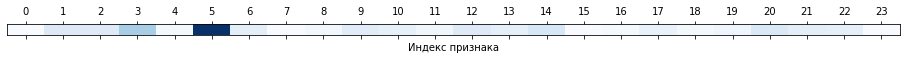

In [76]:
importance = rfc.feature_importances_

plt.figure(figsize=(15,8))
plt.barh(width=importance, y=feature_names)
plt.gca().invert_yaxis()
plt.title("Важность признаков")
plt.show()

mask = importance
plt.matshow( mask.reshape(1,-1), cmap = 'Blues', aspect=0.3)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");


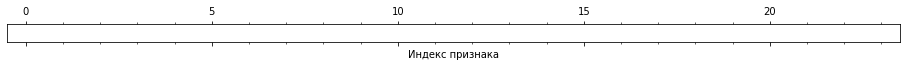

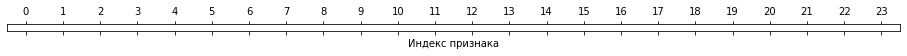

In [79]:
from sklearn.feature_selection  import RFE

rfe_select = RFE(RandomForestRegressor(n_estimators=100, random_state=42),
             n_features_to_select=40)

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask = rfe_select.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

mask = rfe_select.get_support()[:30]
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");

Оптимально : 5


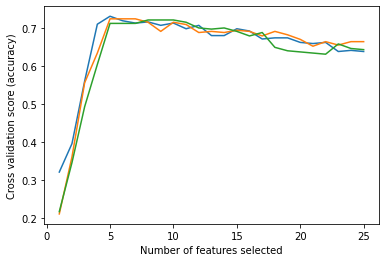

In [80]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 5 informative features
X, y = make_classification(
    n_samples=1000,
    n_features=25,
    n_informative=5, # 5 информативных признаков, остальные линейная комбинация
    n_redundant=2,
    n_repeated=0,
    n_classes=8,
    n_clusters_per_class=1,
    random_state=0,
)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(3),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Оптимально : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.show()

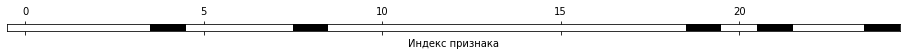

In [81]:
mask = rfecv.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
plt.yticks([])
plt.xlabel("Индекс признака");

In [85]:
# Выводим индексы информативных признаков
informative_feature_indices = np.where(rfecv.support_)[0]

print("Индексы информативных признаков:")
print(informative_feature_indices)


Индексы информативных признаков:
[ 4  8 19 21 24]


In [92]:
# Выводим индексы неинформативных признаков
non_informative_feature_indices = np.where(~rfecv.support_)[0]

print("Индексы неинформативных признаков:")
print(non_informative_feature_indices)


Индексы неинформативных признаков:
[ 0  1  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 20 22 23]


In [95]:
non_informative_feature_names = X_train.columns[non_informative_feature_indices]

print("Названия неинформативных признаков:")
print(non_informative_feature_names)


Названия неинформативных признаков:
Index(['0', '2', '3', '4', '6', '7', '8', '10', '11', '12', '13', '15', '16',
       '20', '21', '22', '23', '25', '27', '28'],
      dtype='object')


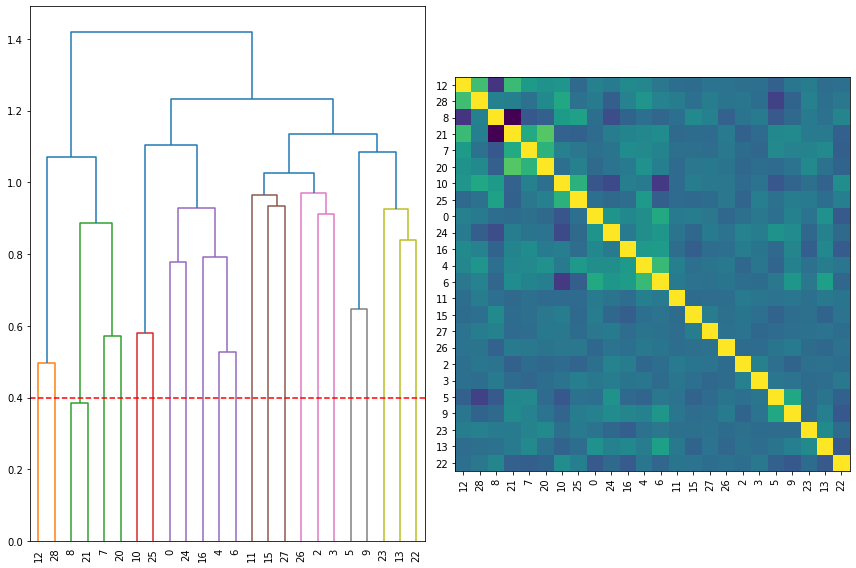

In [101]:
from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels = feature_names,
    ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

ax1.axhline(y=0.4, color='r', linestyle='--')


# distance_matrix = 1 - np.abs(corr)
# dist_linkage = hierarchy.ward(squareform(distance_matrix))
# dendro = hierarchy.dendrogram(
#     dist_linkage, 
#     ax=ax2, leaf_rotation=90
# )

ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(feature_names[dendro["leaves"]], rotation="vertical")
ax2.set_yticklabels(feature_names[dendro["leaves"]])
fig.tight_layout()
plt.show()

In [96]:
# Преобразование списков в множества
bad_features_set = set(bad_features)
non_informative_feature_set = set(non_informative_feature_names)

# Нахождение общих элементов
common_features = bad_features_set.intersection(non_informative_feature_set)

# Вывод результатов
print("Общие элементы в bad_features и non_informative_feature_names:")
print(common_features)


Общие элементы в bad_features и non_informative_feature_names:
{'23', '0', '3', '13', '15', '11', '2', '21', '22', '8', '27'}


In [97]:
values_to_remove = {0, 13, 21}
common_features = common_features.difference(values_to_remove)



In [98]:
common_features

{'0', '11', '13', '15', '2', '21', '22', '23', '27', '3', '8'}

In [99]:
df_train.drop(['0', '11', '13', '15', '2', '21', '22', '23', '27', '3', '8'],axis=1,inplace=True)

In [100]:
df_train

,price,4,5,6,7,9,10,12,16,20,24,25,26,28
0,5320000,-0.223185,1.361397,1.221991,-0.570187,-0.465315,-1.592404,-0.929397,1.472618,-0.263991,1.804941,-0.126718,0.271470,-0.141322
1,3465000,-0.223185,-0.734539,-0.964205,-0.570187,-0.465315,0.729512,-0.929397,-0.679063,-0.263991,-0.554035,-0.126718,-1.010746,-0.141322
2,3500000,-0.223185,-0.734539,-0.692084,-0.570187,-0.465315,-0.024866,0.224410,-0.679063,-0.263991,-0.554035,-0.126718,-1.237596,-0.141322
3,3570000,-0.223185,-0.734539,-0.696696,-0.570187,-0.465315,0.445396,-0.929397,-0.679063,-0.263991,-0.554035,0.417348,-0.987324,-0.141322
4,4130000,-0.223185,-0.734539,-0.239163,-0.570187,-0.465315,-0.024866,0.224410,1.472618,-0.263991,-0.554035,-0.108582,0.838006,-0.141322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,4550000,-0.223185,-0.734539,-0.696696,-0.570187,-0.465315,-0.024866,0.224410,1.472618,-0.263991,-0.554035,-0.126718,-1.532214,-0.141322
404,5250000,-0.223185,1.361397,-0.622901,-0.570187,2.149083,-0.024866,0.224410,-0.679063,-0.263991,1.804941,-0.126718,-1.320247,-0.141322
405,5950000,-0.223185,1.361397,0.640850,-0.570187,2.149083,-0.975186,-0.929397,-0.679063,-0.263991,1.804941,-0.126718,-0.017405,-0.141322
406,4319000,-0.223185,1.361397,-0.515897,-0.570187,-0.465315,0.253372,-0.929397,-0.679063,-0.263991,-0.554035,0.195188,-0.131175,-0.141322


In [104]:
df_train.describe()

,price,4,5,6,7,9,10,12,16,20,24,25,26,28
count,4.080000e+02,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.643597e+06,-0.044734,-0.015345,-0.037179,0.005930,-0.016766,-0.049938,-0.049902,-0.035668,-0.022184,-0.039454,-0.038181,-0.048110,-0.044926
std,1.711368e+06,0.969756,0.996282,1.001595,0.976837,0.986851,1.013027,0.980538,0.986310,1.020601,0.975409,1.031259,1.008422,0.913917
min,1.750000e+06,-2.633407,-0.734539,-1.614530,-0.570187,-0.465315,-5.413279,-0.929397,-0.679063,-2.319351,-0.554035,-5.000645,-1.789595,-3.418780
25%,3.430000e+06,-0.223185,-0.734539,-0.745125,-0.570187,-0.465315,-0.037112,-0.929397,-0.679063,-0.263991,-0.554035,-0.126718,-0.896013,-0.141322
50%,4.270000e+06,-0.223185,-0.734539,-0.300045,-0.570187,-0.465315,-0.024866,0.224410,-0.679063,-0.263991,-0.554035,-0.126718,-0.047954,-0.141322
75%,5.600000e+06,-0.223185,1.361397,0.454055,1.421812,-0.465315,0.284968,0.224410,1.472618,-0.263991,-0.554035,-0.006287,0.787204,-0.141322
max,1.141000e+07,13.826353,1.361397,5.096263,3.413810,2.149083,4.285865,2.532024,1.472618,7.957450,1.804941,13.021551,1.732996,3.136137


In [130]:
df_train.head(0)

,price,4,5,6,7,9,10,12,16,20,24,25,26,28


In [131]:
df_train.drop(['5','25','26','5','28'],axis=1,inplace=True)

In [132]:
df_train

,price,4,6,7,9,10,12,16,20,24
0,5320000,-0.223185,1.221991,-0.570187,-0.465315,-1.592404,-0.929397,1.472618,-0.263991,1.804941
1,3465000,-0.223185,-0.964205,-0.570187,-0.465315,0.729512,-0.929397,-0.679063,-0.263991,-0.554035
2,3500000,-0.223185,-0.692084,-0.570187,-0.465315,-0.024866,0.224410,-0.679063,-0.263991,-0.554035
3,3570000,-0.223185,-0.696696,-0.570187,-0.465315,0.445396,-0.929397,-0.679063,-0.263991,-0.554035
4,4130000,-0.223185,-0.239163,-0.570187,-0.465315,-0.024866,0.224410,1.472618,-0.263991,-0.554035
...,...,...,...,...,...,...,...,...,...,...
403,4550000,-0.223185,-0.696696,-0.570187,-0.465315,-0.024866,0.224410,1.472618,-0.263991,-0.554035
404,5250000,-0.223185,-0.622901,-0.570187,2.149083,-0.024866,0.224410,-0.679063,-0.263991,1.804941
405,5950000,-0.223185,0.640850,-0.570187,2.149083,-0.975186,-0.929397,-0.679063,-0.263991,1.804941
406,4319000,-0.223185,-0.515897,-0.570187,-0.465315,0.253372,-0.929397,-0.679063,-0.263991,-0.554035


# KNN

In [133]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    KNeighborsRegressor())])

kfold = KFold(n_splits=5, shuffle=True, random_state = 42)

p = np.arange(1,6)
n_neighbors = np.arange(1,140,2)
scaling = [ MinMaxScaler(), StandardScaler()]
#weights = ['uniform','distance'] #weights=distance использовать не буду, т.к с ним score train=1, т.е идет переобучение
param_grid = {
   # 'preprocessing': scaling,
    'regressor': [KNeighborsRegressor()],
    'regressor__n_neighbors': n_neighbors,
    'regressor__p': p,
}


grid = RandomizedSearchCV(pipe,param_grid, cv=kfold,verbose=4,return_train_score=True,n_iter=200,scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train,y_train)
grid

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV 1/5] END regressor=KNeighborsRegressor(), regressor__n_neighbors=69, regressor__p=4;, score=(train=-0.213, test=-0.195) total time=   0.0s
[CV 2/5] END regressor=KNeighborsRegressor(), regressor__n_neighbors=69, regressor__p=4;, score=(train=-0.213, test=-0.208) total time=   0.0s
[CV 3/5] END regressor=KNeighborsRegressor(), regressor__n_neighbors=69, regressor__p=4;, score=(train=-0.212, test=-0.210) total time=   0.0s
[CV 4/5] END regressor=KNeighborsRegressor(), regressor__n_neighbors=69, regressor__p=4;, score=(train=-0.202, test=-0.238) total time=   0.0s
[CV 5/5] END regressor=KNeighborsRegressor(), regressor__n_neighbors=69, regressor__p=4;, score=(train=-0.210, test=-0.223) total time=   0.0s
[CV 1/5] END regressor=KNeighborsRegressor(), regressor__n_neighbors=119, regressor__p=5;, score=(train=-0.237, test=-0.216) total time=   0.0s
[CV 2/5] END regressor=KNeighborsRegressor(), regressor__n_neighbors=119, reg

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                             ('regressor',
                                              KNeighborsRegressor())]),
                   n_iter=200,
                   param_distributions={'regressor': [KNeighborsRegressor(n_neighbors=31,
                                                                          p=1)],
                                        'regressor__n_neighbors': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139]),
                                        'regressor__p': array([1, 2, 3, 4, 5])},
                   return_train_score=True,
                   scoring='neg_mean_absolute_percentage_error', verbose=4)

In [134]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,168,14,33,172,196,38,63,146,84,6,161,182,101,13,67,26,12,157,180,55,176,66,85,156,183,173,36,65,165,59,72,90,133,5,109,174,150,3,134,120,...,76,87,139,89,135,149,112,103,159,1,27,100,147,171,122,114,195,82,189,9,68,191,75,110,61,78,130,160,163,105,71,188,43,80,56,138,30,62,16,35
mean_fit_time,0.002563,0.002597,0.002623,0.002643,0.002936,0.002616,0.002814,0.002659,0.002932,0.002802,0.003065,0.002838,0.002752,0.002785,0.00287,0.00262,0.002907,0.002525,0.002942,0.002768,0.002625,0.00295,0.002681,0.00262,0.002559,0.002677,0.002561,0.00316,0.002844,0.003097,0.002937,0.00277,0.0029,0.002792,0.002674,0.002597,0.002523,0.002671,0.002607,0.003028,...,0.003091,0.003451,0.002747,0.002799,0.002535,0.002805,0.00272,0.002642,0.002864,0.002883,0.002644,0.002876,0.00302,0.002682,0.002879,0.002729,0.003154,0.003044,0.002886,0.003073,0.002843,0.002921,0.003075,0.003301,0.002863,0.002941,0.002929,0.002865,0.003711,0.002947,0.002858,0.003008,0.003122,0.003429,0.003048,0.002935,0.002955,0.003158,0.002878,0.002658
std_fit_time,0.000201,0.00016,0.000142,0.000091,0.000294,0.000055,0.000264,0.000165,0.000269,0.000061,0.000288,0.000329,0.00028,0.000219,0.000183,0.000093,0.000375,0.000074,0.000259,0.000163,0.000083,0.000144,0.000054,0.000125,0.000142,0.000175,0.0001,0.000217,0.000288,0.000554,0.000097,0.000149,0.000591,0.000103,0.000109,0.000087,0.000143,0.000062,0.000149,0.00045,...,0.000214,0.000258,0.000193,0.000165,0.000106,0.000317,0.000119,0.000108,0.000405,0.000185,0.000187,0.000438,0.000278,0.000064,0.00033,0.00014,0.000318,0.00033,0.000125,0.000473,0.000227,0.000185,0.000208,0.001132,0.000373,0.000063,0.00029,0.000193,0.001116,0.000335,0.000117,0.00042,0.000281,0.000462,0.000208,0.000289,0.00021,0.00016,0.000183,0.000132
mean_score_time,0.001929,0.002047,0.001923,0.001869,0.001871,0.001719,0.002137,0.001837,0.002034,0.001724,0.001883,0.001674,0.00217,0.002122,0.002256,0.002249,0.002303,0.002187,0.002345,0.001565,0.001876,0.001686,0.002189,0.001605,0.002241,0.002079,0.002048,0.003779,0.002007,0.00205,0.002018,0.001979,0.002204,0.002025,0.001711,0.001955,0.001926,0.002022,0.003397,0.003377,...,0.005593,0.005411,0.002474,0.002517,0.005218,0.00249,0.00534,0.002488,0.005475,0.005504,0.005399,0.005423,0.005312,0.005437,0.005601,0.005501,0.005505,0.003507,0.002895,0.008957,0.006113,0.003133,0.005846,0.00831,0.005734,0.002851,0.00291,0.008442,0.008642,0.006006,0.003367,0.005676,0.002867,0.005791,0.00175,0.002826,0.005784,0.006043,0.006499,0.003037
std_score_time,0.000079,0.000137,0.000073,0.000067,0.000162,0.000038,0.00022,0.000033,0.000322,0.000055,0.000215,0.000052,0.000123,0.000073,0.000235,0.000207,0.000216,0.000071,0.000296,0.000046,0.000207,0.00006,0.000143,0.000027,0.000101,0.000156,0.000241,0.000419,0.000165,0.00051,0.000183,0.000068,0.000468,0.000065,0.000037,0.000052,0.000056,0.00003,0.000356,0.000124,...,0.000098,0.000338,0.000123,0.000288,0.0001,0.000064,0.000152,0.000269,0.000506,0.000335,0.00026,0.004656,0.000074,0.000212,0.000144,0.000205,0.000123,0.00137,0.000114,0.006174,0.000579,0.000373,0.000285,0.005094,0.000206,0.00016,0.000103,0.005108,0.005916,0.000403,0.000592,0.000287,0.000093,0.000345,0.000304,0.000126,0.000206,0.000165,0.001865,0.000366
param_regressor__p,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,1,1,1,2,2,3,2,2,2,2,2,2,2,2,2,2,4,5,...,3,3,1,2,5,1,4,2,3,5,4,1,3,5,3,3,4,2,1,3,4,2,5,3,5,1,2,3,5,4,2,3,1,5,2,1,5,4,5,3
param_regressor__n_neighbors,31,37,27,25,17,9,39,29,19,11,13,7,49,51,53,55,57,59,61,7,15,9,65,3,67,47,35,9,43,21,33,45,49,53,17,37,39,41,5,5,...,113,115,119,117,115,121,117,119,119,119,119,123,121,121,123,125,125,125,127,127,127,127,127,129,129,131,131,133,131,133,135,135,137,135,1,139,137,139,139,1
param_regressor,"KNeighborsRegressor(n_neighbors=31, p=1)","KNeighborsRegressor(n_neighbors=31, p=1)","KNeighborsRegressor(n_neighbors=31, p=1)","KNeighborsRegressor(n_neighbors=31, p=1)","KNeighborsRegressor(n_neighbors=31, p=1)","KNeighborsRegressor(n_neighbors=31, p=1)","KNeighborsRegressor(n_neighbors=31, p=1)","K

In [141]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',    KNeighborsRegressor())])

kfold = KFold(n_splits=5, shuffle=True, random_state = 42)

p = np.arange(1,4)
n_neighbors = np.arange(10,50)
scaling = [ MinMaxScaler(), StandardScaler()]
#weights = ['uniform','distance'] weights=distance использовать не буду, т.к с ним score train=1, т.е идет переобучение
param_grid = {
    'preprocessing': scaling,
    'regressor': [KNeighborsRegressor()],
    'regressor__n_neighbors': n_neighbors,
    'regressor__p': p,
}


grid = GridSearchCV(pipe,param_grid, cv=kfold,verbose=4,return_train_score=True,scoring='neg_mean_absolute_percentage_error')
grid.fit(X_train,y_train)
grid

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=10, regressor__p=1;, score=(train=-0.181, test=-0.176) total time=   0.0s
[CV 2/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=10, regressor__p=1;, score=(train=-0.168, test=-0.195) total time=   0.0s
[CV 3/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=10, regressor__p=1;, score=(train=-0.183, test=-0.176) total time=   0.0s
[CV 4/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=10, regressor__p=1;, score=(train=-0.168, test=-0.220) total time=   0.0s
[CV 5/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegressor(), regressor__n_neighbors=10, regressor__p=1;, score=(train=-0.172, test=-0.213) total time=   0.0s
[CV 1/5] END preprocessing=MinMaxScaler(), regressor=KNeighborsRegresso

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'preprocessing': [MinMaxScaler(), StandardScaler()],
                         'regressor': [KNeighborsRegressor(n_neighbors=20,
                                                           p=1)],
                         'regressor__n_neighbors': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49]),
                         'regressor__p': array([1, 2, 3])},
             return_train_score=True,
             scoring='neg_mean_absolute_percentage_error', verbose=4)

In [142]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,150,147,153,135,138,144,141,156,132,129,126,123,145,142,168,151,159,154,162,120,160,165,171,139,175,148,157,172,178,136,163,169,166,133,176,173,174,181,177,179,...,40,14,55,52,26,104,58,29,17,35,38,116,41,61,101,113,107,110,119,20,23,98,47,44,95,89,50,92,53,86,83,80,77,56,74,71,65,59,68,62
mean_fit_time,0.002977,0.00321,0.002958,0.002999,0.002835,0.003203,0.003191,0.003095,0.003341,0.003574,0.003075,0.003294,0.003452,0.003344,0.003386,0.003069,0.002769,0.002907,0.0028,0.003438,0.002816,0.002915,0.003041,0.002746,0.002981,0.003549,0.002693,0.002848,0.002814,0.002762,0.002623,0.003118,0.002898,0.002931,0.00303,0.003019,0.002929,0.00276,0.003131,0.002835,...,0.002593,0.002717,0.002609,0.002702,0.002666,0.002803,0.002754,0.002687,0.002815,0.00281,0.002771,0.002707,0.002818,0.002582,0.002863,0.003133,0.003036,0.003025,0.002665,0.002813,0.002569,0.002831,0.002556,0.002617,0.002739,0.002655,0.002739,0.002623,0.002707,0.002736,0.002752,0.002845,0.002844,0.002641,0.002748,0.002719,0.002598,0.00274,0.002608,0.00274
std_fit_time,0.00024,0.00039,0.000203,0.000068,0.000125,0.00046,0.000168,0.000316,0.000223,0.000914,0.000319,0.000242,0.000446,0.000346,0.000385,0.000362,0.000125,0.00029,0.000194,0.000535,0.00016,0.000101,0.000384,0.000102,0.000148,0.000388,0.000207,0.000092,0.000128,0.000248,0.000052,0.000082,0.000088,0.000179,0.000247,0.00019,0.000063,0.000086,0.000291,0.000231,...,0.000065,0.000111,0.000121,0.00021,0.000061,0.000183,0.000179,0.000066,0.000338,0.000093,0.000118,0.00018,0.000187,0.000142,0.000083,0.000244,0.000374,0.00008,0.000055,0.000206,0.000076,0.00013,0.000108,0.000135,0.000153,0.000075,0.000095,0.000177,0.000246,0.000256,0.000245,0.000139,0.000122,0.00005,0.000201,0.000109,0.000087,0.000192,0.000091,0.000037
mean_score_time,0.002005,0.001988,0.001922,0.002133,0.001901,0.00203,0.00231,0.001948,0.002153,0.002544,0.001793,0.001914,0.001957,0.002071,0.002115,0.001872,0.001952,0.001892,0.002065,0.002371,0.002049,0.001884,0.002075,0.001784,0.002019,0.001943,0.002035,0.001844,0.001992,0.001794,0.001914,0.002055,0.00206,0.001936,0.004861,0.004646,0.002264,0.00198,0.002021,0.00469,...,0.001804,0.003833,0.002058,0.001826,0.003958,0.004693,0.001967,0.003982,0.003815,0.004166,0.004096,0.004915,0.004293,0.001908,0.004464,0.005142,0.004821,0.004993,0.004668,0.003809,0.003903,0.004415,0.004064,0.004151,0.00461,0.004412,0.004185,0.004426,0.004209,0.004417,0.004448,0.004502,0.004446,0.004172,0.0045,0.004455,0.004311,0.004152,0.004421,0.004311
std_score_time,0.000144,0.000211,0.000052,0.000217,0.000115,0.000201,0.000451,0.000073,0.000184,0.000385,0.000116,0.000085,0.000219,0.000305,0.000199,0.00012,0.000103,0.000094,0.000198,0.000633,0.00027,0.00006,0.000208,0.000042,0.000218,0.000147,0.000289,0.000117,0.000107,0.000101,0.000155,0.000222,0.000219,0.000158,0.000567,0.000174,0.000336,0.000039,0.000088,0.00021,...,0.000029,0.000124,0.000303,0.000049,0.000098,0.000189,0.000114,0.000127,0.00017,0.000271,0.000143,0.000266,0.000159,0.000194,0.00023,0.000088,0.000312,0.000073,0.000219,0.000163,0.000137,0.000107,0.000131,0.000107,0.000229,0.000151,0.000171,0.00016,0.000236,0.000173,0.000116,0.000158,0.000058,0.000116,0.000125,0.000183,0.000181,0.000188,0.000239,0.000072
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxSca

In [143]:
mode =  Pipeline([
            ('preprocessing', StandardScaler()), 
            ('regressor',     KNeighborsRegressor(n_neighbors=20, p=1)) #пока эта модель из кнн самая лучшая
            ])
mode.fit(X_train, y_train)
knn_pr = mode.predict(X_test)

In [144]:
mode.score(X_test,y_test)

0.5057987149448329

In [148]:
mean_absolute_percentage_error(y_test,knn_pr)

0.20427937306133614

# RandomForest

In [ ]:
pipe = Pipeline([('regressor',RandomForestRegressor())])

kfold = KFold(n_splits=5, shuffle=True, random_state = 42)

n_estimators=[10,100,300,500]
max_features=['sqrt','log2',None]
#max_depth=[1]
#min_samples_split=np.arange(2,50,4)
min_samples_leaf=[1,2,5,7,10,15,20,35,50]
param_dist = { 'regressor': [RandomForestRegressor()],
               'regressor__n_estimators': n_estimators,
               'regressor__max_features': max_features,
              # 'regressor__max_depth': max_depth,
            #   'regressor__min_samples_split': min_samples_split,
               'regressor__min_samples_leaf': min_samples_leaf}

rand_cv = GridSearchCV(pipe,param_dist,n_jobs=-1, cv=kfold,verbose=2,return_train_score=True,)
rand_cv.fit(X_train,y_train)
rand_cv

In [ ]:
RF_result = pd.DataFrame(rand_cv.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
RF_result

In [ ]:
model = Pipeline([('regressor',RandomForestRegressor(n_estimators=828,min_samples_leaf=20,max_features=None))])
model.fit(X_train, y_train)
RF = model.predict(X_test)

In [ ]:
model.score(X_test,y_test)

In [156]:
df_train

,price,4,6,7,9,10,12,16,20,24
0,5320000,-0.223185,1.221991,-0.570187,-0.465315,-1.592404,-0.929397,1.472618,-0.263991,1.804941
1,3465000,-0.223185,-0.964205,-0.570187,-0.465315,0.729512,-0.929397,-0.679063,-0.263991,-0.554035
2,3500000,-0.223185,-0.692084,-0.570187,-0.465315,-0.024866,0.224410,-0.679063,-0.263991,-0.554035
3,3570000,-0.223185,-0.696696,-0.570187,-0.465315,0.445396,-0.929397,-0.679063,-0.263991,-0.554035
4,4130000,-0.223185,-0.239163,-0.570187,-0.465315,-0.024866,0.224410,1.472618,-0.263991,-0.554035
...,...,...,...,...,...,...,...,...,...,...
403,4550000,-0.223185,-0.696696,-0.570187,-0.465315,-0.024866,0.224410,1.472618,-0.263991,-0.554035
404,5250000,-0.223185,-0.622901,-0.570187,2.149083,-0.024866,0.224410,-0.679063,-0.263991,1.804941
405,5950000,-0.223185,0.640850,-0.570187,2.149083,-0.975186,-0.929397,-0.679063,-0.263991,1.804941
406,4319000,-0.223185,-0.515897,-0.570187,-0.465315,0.253372,-0.929397,-0.679063,-0.263991,-0.554035


In [158]:
df_train = df_train[selected_columns]

KeyError: '[4, 6, 7, 9, 10, 12, 16, 20, 24] not in index'

In [160]:
selected_columns = ['price', 4, 6, 7, 9, 10, 12, 16, 20, 24]

In [162]:
df_train[['price', 4, 6, 7, 9, 10, 12, 16, 20, 24]]

KeyError: '[4, 6, 7, 9, 10, 12, 16, 20, 24] not in index'

In [164]:
df_train = df_train.loc[:, selected_columns]

KeyError: '[4, 6, 7, 9, 10, 12, 16, 20, 24] not in index'